In [1]:
from os.path import join

import earthaccess

import geopandas as gpd
import rasters as rt

from harmonized_landsat_sentinel import harmonized_landsat_sentinel as HLS
from harmonized_landsat_sentinel import timeseries
from sentinel_tiles import sentinel_tiles

[2025-06-18 09:30:13 INFO] HLS 2.0 working directory: ~/data/HLS2
[2025-06-18 09:30:13 INFO] HLS 2.0 download directory: ~/data/HLS2
[2025-06-18 09:30:14 INFO] You're now authenticated with NASA Earthdata Login


date range

In [2]:
start_date = "2023-04-01"
end_date = "2023-06-01"

download directory

In [3]:
download_directory = "~/data/HLS_download"

output directory

In [4]:
output_directory = "~/data/Kings Canyon EMIT"

Upper Kings area of interest

In [5]:
gdf = gpd.read_file("upper_kings.kml")
gdf

,Name,Description,geometry
0,0,"<html xmlns:fo=""http://www.w3.org/1999/XSL/For...","MULTIPOLYGON Z (((-118.75179 36.85601 0, -118...."


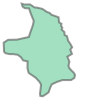

In [6]:
gdf.geometry[0]

In [7]:
bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox
bbox_UTM

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_10091/4116591760.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  bbox_UTM = rt.Polygon(gdf.unary_union).UTM.bbox


BBox(xmin=343776.99999338, ymin=4050631.999999944, xmax=381105.99999904167, ymax=4111651.9999999665, crs="EPSG:32611")

In [8]:
grid = rt.RasterGrid.from_bbox(bbox_UTM, cell_size=60, crs=bbox_UTM.crs)
grid

{
  "dimensions": {
    "rows": 1017,
    "cols": 622
  },
  "bbox": {
    "xmin": 343776.99999338,
    "ymin": 4050631.9999999665,
    "xmax": 381096.99999338,
    "ymax": 4111651.9999999665
  },
  "crs": "EPSG:32611",
  "resolution": {
    "cell_width": 60.0,
    "cell_height": -60.0
  }
}

Log into `earthaccess` using `netrc` credentials

In [9]:
earthaccess.login(strategy="netrc", persist=True)

search for EMIT granules covering area of interest

In [10]:
# search_results = search_EMIT_L2A_RFL_granules(
#     start_UTC=start_date,
#     end_UTC=end_date,
#     geometry=grid
# )

# search_results

download each granule, extract subset projected to target grid, and write to multi-band GeoTIFF

In [11]:
# for search_result in search_results:
#     granule_ID = dict(search_result.items())["meta"]["native-id"]
#     print(granule_ID)
#     output_filename = join(output_directory, f"{granule_ID}.tif")
#     granule = retrieve_EMIT_L2A_RFL_granule(search_result)
#     reflectance = granule.reflectance(geometry=grid)
#     print(output_filename)
#     reflectance.to_geotiff(output_filename)

In [12]:
sentinel_tiles.tiles(gdf.unary_union)

/var/folders/hk/35_x93nx79vg1zmd2fy1vcbr0000gq/T/ipykernel_10091/1555463836.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  sentinel_tiles.tiles(gdf.unary_union)


{'11SLA', '11SLB'}

In [13]:
HLS.search(
    tile="11SLA",
    start_UTC=start_date,
    end_UTC=end_date
)

[2025-06-18 09:30:19 INFO] searching HLSS30.v2.0, HLSL30.v2.0 at 11SLA from 2023-04-01 to 2023-06-01
[2025-06-18 09:30:29 INFO] Currently storing 37 DataGranules for HLS2


,ID,sensor,tile,date_UTC,timestamp_str,granule
0,HLS.S30.T11SLA.2023091T183929.v2.0,S30,11SLA,2023-04-01,2023-04-01T18:54:19.092Z,"{'meta': {'concept-type': 'granule', 'concept-..."
1,HLS.S30.T11SLA.2023093T182921.v2.0,S30,11SLA,2023-04-03,2023-04-03T18:44:19.031Z,"{'meta': {'concept-type': 'granule', 'concept-..."
2,HLS.L30.T11SLA.2023096T183339.v2.0,L30,11SLA,2023-04-06,2023-04-06T18:33:39.624Z,"{'meta': {'concept-type': 'granule', 'concept-..."
3,HLS.S30.T11SLA.2023096T183921.v2.0,S30,11SLA,2023-04-06,2023-04-06T18:54:15.555Z,"{'meta': {'concept-type': 'granule', 'concept-..."
4,HLS.L30.T11SLA.2023097T182710.v2.0,L30,11SLA,2023-04-07,2023-04-07T18:27:10.782Z,"{'meta': {'concept-type': 'granule', 'concept-..."
5,HLS.S30.T11SLA.2023098T182919.v2.0,S30,11SLA,2023-04-08,2023-04-08T18:44:21.913Z,"{'meta': {'concept-type': 'granule', 'concept-..."
6,HLS.S30.T11SLA.2023101T183919.v2.0,S30,11SLA,2023-04-11,2023-04-11T18:54:16.912Z,"{'meta': {'concept-type': 'granule', 'concept-..."
7,HLS.S30.T11SLA.2023103T182921.v2.0,S30,11SLA,2023-04-13,2023-04-13T18:44:19.645Z,"{'meta': {'concept-type': 'granule', 'concept-..."
8,HLS.L30.T11SLA.2023104T183316.v2.0,L30,11SLA,2023-04-14,2023-04-14T18:33:16.349Z,"{'meta': {'concept-type': 'granule', 'concept-..."
9,HLS.L30.T11SLA.2023105T182723.v2.0,L30,11SLA,2023-04-15,2023-04-15T18:27:23.147Z,"{'meta': {'concept-type': 'granule', 'concept-..."


[2025-06-18 09:30:30 INFO] searching for Sentinel tile 11SLA on 2023-04-01
[2025-06-18 09:30:30 INFO] started listing available HLS2 granules at tile 11SLA from 2023-04-01 to 2023-04-01
[2025-06-18 09:30:30 INFO] searching HLSS30.v2.0, HLSL30.v2.0 at 11SLA from 2023-03-16 to 2023-04-01
[2025-06-18 09:30:33 INFO] Currently storing 47 DataGranules for HLS2
[2025-06-18 09:30:33 INFO] finished listing available HLS2 granules at tile 11SLA from 2023-04-01 to 2023-04-01 (3.69)
[2025-06-18 09:30:33 INFO] retrieving Sentinel tile 11SLA on 2023-04-01: ~/data/HLS2/2023.04.01/HLS.S30.T11SLA.2023091T183929.v2.0
[2025-06-18 09:30:33 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B08.tif already downloaded
[2025-06-18 09:30:33 INFO] File HLS.S30.T11SLA.2023091T18392

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:33 INFO] searching for Landsat tile 11SLA on 2023-04-01


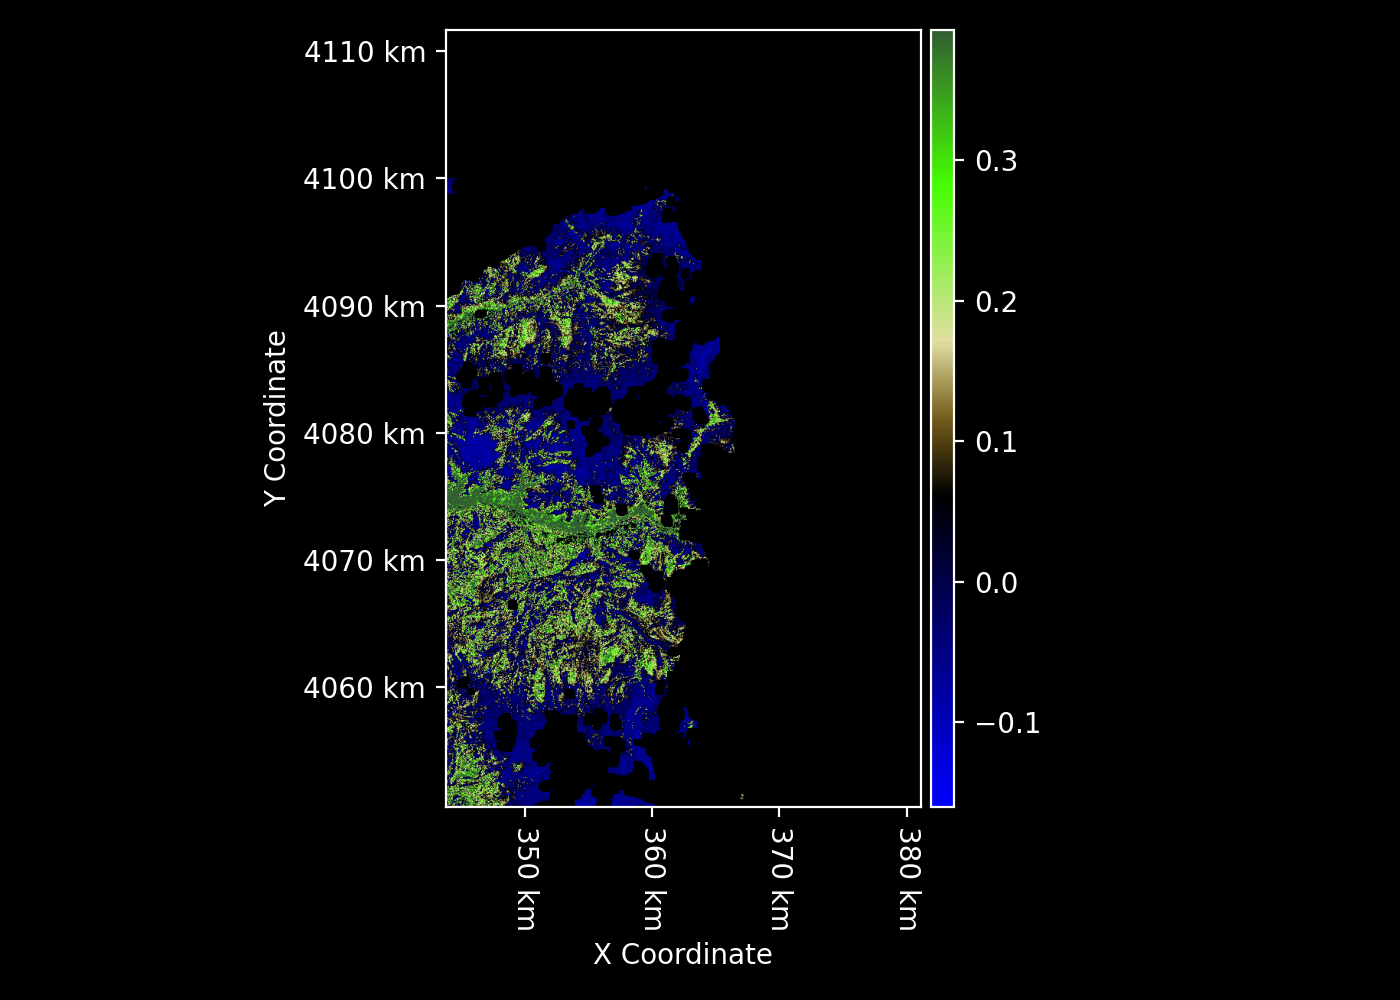

In [14]:
HLS.NDVI("11SLA", "2023-04-01").to_geometry(grid)

In [ ]:
timeseries(
    bands=["red", "green", "blue", "NIR", "SWIR1", "SWIR2"],
    tile="11SLA",
    start_date=start_date,
    end_date=end_date,
    output_directory="~/data/kings_canyon_HLS",
    geometry=grid
)

[2025-06-18 09:30:35 INFO] Generating HLS timeseries with parameters:
[2025-06-18 09:30:35 INFO]   Bands: red, green, blue, NIR, SWIR1, SWIR2
[2025-06-18 09:30:35 INFO]   Tile: 11SLA
[2025-06-18 09:30:35 INFO]   Start date: 2023-04-01
[2025-06-18 09:30:35 INFO]   End date: 2023-06-01
[2025-06-18 09:30:35 INFO]   Directory: ~/data/HLS2
[2025-06-18 09:30:35 INFO] started listing available HLS2 granules at tile 11SLA from 2023-04-01 to 2023-06-01
[2025-06-18 09:30:35 INFO] searching HLSS30.v2.0, HLSL30.v2.0 at 11SLA from 2023-03-16 to 2023-06-01
[2025-06-18 09:30:43 INFO] Currently storing 47 DataGranules for HLS2
[2025-06-18 09:30:43 INFO] finished listing available HLS2 granules at tile 11SLA from 2023-04-01 to 2023-06-01 (8.14)
[2025-06-18 09:30:43 INFO] 34 dates available:
[2025-06-18 09:30:43 INFO]   * 2023-04-01
[2025-06-18 09:30:43 INFO]   * 2023-04-03
[2025-06-18 09:30:43 INFO]   * 2023-04-06
[2025-06-18 09:30:43 INFO]   * 2023-04-07
[2025-06-18 09:30:43 INFO]   * 2023-04-08
[2025

QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B08.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.Fmask.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B12.tif already downloaded
[2025-06-18 09:30:43 INFO] File HLS.S30.T11SLA.2023091T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:43 INFO] searching for Landsat tile 11SLA on 2023-04-01
[2025-06-18 09:30:43 INFO] writing image to ~/data/kings_canyon_HLS/HLS_red_11SLA_20230401.tif
[2025-06-18 09:30:45 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-01
[2025-06-18 09:30:45 INFO] searching for Sentinel tile 11SLA on 2023-04-01
[2025-06-18 09:30:45 INFO] retrieving Sentinel tile 11SLA on 2023-04-01: ~/data/HLS2/2023.04.01/HLS.S30.T11SLA.2023091T183929.v2.0
[2025-06-18 09:30:45 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B08.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.Fmask.tif already downloaded
[2025-06-18 09:30:45 INFO] File HLS.S30.T11SLA.2023091T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:45 INFO] searching for Landsat tile 11SLA on 2023-04-01
[2025-06-18 09:30:46 INFO] writing image to ~/data/kings_canyon_HLS/HLS_green_11SLA_20230401.tif
[2025-06-18 09:30:48 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-01
[2025-06-18 09:30:48 INFO] searching for Sentinel tile 11SLA on 2023-04-01
[2025-06-18 09:30:48 INFO] retrieving Sentinel tile 11SLA on 2023-04-01: ~/data/HLS2/2023.04.01/HLS.S30.T11SLA.2023091T183929.v2.0
[2025-06-18 09:30:48 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B08.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.Fmask.tif already downloaded
[2025-06-18 09:30:48 INFO] File HLS.S30.T11SLA.2023091T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:48 INFO] searching for Landsat tile 11SLA on 2023-04-01
[2025-06-18 09:30:48 INFO] writing image to ~/data/kings_canyon_HLS/HLS_blue_11SLA_20230401.tif
[2025-06-18 09:30:50 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-01
[2025-06-18 09:30:50 INFO] searching for Sentinel tile 11SLA on 2023-04-01
[2025-06-18 09:30:50 INFO] retrieving Sentinel tile 11SLA on 2023-04-01: ~/data/HLS2/2023.04.01/HLS.S30.T11SLA.2023091T183929.v2.0
[2025-06-18 09:30:50 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:50 INFO] File HLS.S30.T11SLA.2023091T18392

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:50 INFO] searching for Landsat tile 11SLA on 2023-04-01
[2025-06-18 09:30:50 INFO] writing image to ~/data/kings_canyon_HLS/HLS_NIR_11SLA_20230401.tif
[2025-06-18 09:30:52 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-01
[2025-06-18 09:30:52 INFO] searching for Sentinel tile 11SLA on 2023-04-01
[2025-06-18 09:30:52 INFO] retrieving Sentinel tile 11SLA on 2023-04-01: ~/data/HLS2/2023.04.01/HLS.S30.T11SLA.2023091T183929.v2.0
[2025-06-18 09:30:52 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B08.tif already downloaded
[2025-06-18 09:30:52 INFO] File HLS.S30.T11SLA.2023091T18392

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:52 INFO] searching for Landsat tile 11SLA on 2023-04-01
[2025-06-18 09:30:53 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR1_11SLA_20230401.tif
[2025-06-18 09:30:55 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-01
[2025-06-18 09:30:55 INFO] searching for Sentinel tile 11SLA on 2023-04-01
[2025-06-18 09:30:55 INFO] retrieving Sentinel tile 11SLA on 2023-04-01: ~/data/HLS2/2023.04.01/HLS.S30.T11SLA.2023091T183929.v2.0
[2025-06-18 09:30:55 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B09.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B04.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B10.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B01.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B05.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B11.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.SAA.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B07.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.B08.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183929.v2.0.Fmask.tif already downloaded
[2025-06-18 09:30:55 INFO] File HLS.S30.T11SLA.2023091T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:55 INFO] searching for Landsat tile 11SLA on 2023-04-01
[2025-06-18 09:30:55 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR2_11SLA_20230401.tif
[2025-06-18 09:30:57 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-03
[2025-06-18 09:30:57 INFO] searching for Sentinel tile 11SLA on 2023-04-03
[2025-06-18 09:30:57 INFO] retrieving Sentinel tile 11SLA on 2023-04-03: ~/data/HLS2/2023.04.03/HLS.S30.T11SLA.2023093T182921.v2.0
[2025-06-18 09:30:57 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B03.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B11.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B05.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B10.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B09.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B12.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B06.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B08.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B02.tif already downloaded
[2025-06-18 09:30:57 INFO] File HLS.S30.T11SLA.2023093T18292

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:57 INFO] searching for Landsat tile 11SLA on 2023-04-03
[2025-06-18 09:30:57 INFO] writing image to ~/data/kings_canyon_HLS/HLS_red_11SLA_20230403.tif
[2025-06-18 09:30:59 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-03
[2025-06-18 09:30:59 INFO] searching for Sentinel tile 11SLA on 2023-04-03
[2025-06-18 09:30:59 INFO] retrieving Sentinel tile 11SLA on 2023-04-03: ~/data/HLS2/2023.04.03/HLS.S30.T11SLA.2023093T182921.v2.0
[2025-06-18 09:30:59 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B03.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B11.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.SZA.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B05.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B09.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VZA.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B06.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B12.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B08.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B8A.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VAA.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B02.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B04.tif already downloaded
[2025-06-18 09:30:59 INFO] File HLS.S30.T11SLA.2023093T18292

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:30:59 INFO] searching for Landsat tile 11SLA on 2023-04-03
[2025-06-18 09:30:59 INFO] writing image to ~/data/kings_canyon_HLS/HLS_green_11SLA_20230403.tif
[2025-06-18 09:31:00 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-03
[2025-06-18 09:31:00 INFO] searching for Sentinel tile 11SLA on 2023-04-03
[2025-06-18 09:31:00 INFO] retrieving Sentinel tile 11SLA on 2023-04-03: ~/data/HLS2/2023.04.03/HLS.S30.T11SLA.2023093T182921.v2.0
[2025-06-18 09:31:00 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B10.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B05.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B12.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B08.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:00 INFO] File HLS.S30.T11SLA.2023093T18292

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:00 INFO] searching for Landsat tile 11SLA on 2023-04-03
[2025-06-18 09:31:01 INFO] writing image to ~/data/kings_canyon_HLS/HLS_blue_11SLA_20230403.tif
[2025-06-18 09:31:02 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-03
[2025-06-18 09:31:02 INFO] searching for Sentinel tile 11SLA on 2023-04-03
[2025-06-18 09:31:02 INFO] retrieving Sentinel tile 11SLA on 2023-04-03: ~/data/HLS2/2023.04.03/HLS.S30.T11SLA.2023093T182921.v2.0
[2025-06-18 09:31:02 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B10.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B05.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B12.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B08.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:02 INFO] File HLS.S30.T11SLA.2023093T18292

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:02 INFO] searching for Landsat tile 11SLA on 2023-04-03
[2025-06-18 09:31:02 INFO] writing image to ~/data/kings_canyon_HLS/HLS_NIR_11SLA_20230403.tif
[2025-06-18 09:31:03 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-03
[2025-06-18 09:31:03 INFO] searching for Sentinel tile 11SLA on 2023-04-03
[2025-06-18 09:31:03 INFO] retrieving Sentinel tile 11SLA on 2023-04-03: ~/data/HLS2/2023.04.03/HLS.S30.T11SLA.2023093T182921.v2.0
[2025-06-18 09:31:03 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.Fmask.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B05.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B10.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B12.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B08.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:03 INFO] File HLS.S30.T11SLA.2023093T18292

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:03 INFO] searching for Landsat tile 11SLA on 2023-04-03
[2025-06-18 09:31:04 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR1_11SLA_20230403.tif
[2025-06-18 09:31:05 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-03
[2025-06-18 09:31:05 INFO] searching for Sentinel tile 11SLA on 2023-04-03
[2025-06-18 09:31:05 INFO] retrieving Sentinel tile 11SLA on 2023-04-03: ~/data/HLS2/2023.04.03/HLS.S30.T11SLA.2023093T182921.v2.0
[2025-06-18 09:31:05 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B10.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B05.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B12.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B08.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T182921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:05 INFO] File HLS.S30.T11SLA.2023093T18292

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:05 INFO] searching for Landsat tile 11SLA on 2023-04-03
[2025-06-18 09:31:05 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR2_11SLA_20230403.tif
[2025-06-18 09:31:06 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-06
[2025-06-18 09:31:06 INFO] searching for Sentinel tile 11SLA on 2023-04-06
[2025-06-18 09:31:06 INFO] retrieving Sentinel tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.S30.T11SLA.2023096T183921.v2.0
[2025-06-18 09:31:06 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B01.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B07.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B10.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B05.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.S30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:06 INFO] searching for Landsat tile 11SLA on 2023-04-06
[2025-06-18 09:31:06 INFO] retrieving Landsat tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.L30.T11SLA.2023096T183339.v2.0
[2025-06-18 09:31:06 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B10.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B05.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B07.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B11.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B03.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B06.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B02.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B09.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B01.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B04.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:06 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS_connection.py:513: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-06-18 09:31:09 INFO] writing image to ~/data/kings_canyon_HLS/HLS_red_11SLA_20230406.tif
[2025-06-18 09:31:12 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-06
[2025-06-18 09:31:12 INFO] searching for Sentinel tile 11SLA on 2023-04-06
[2025-06-18 09:31:12 INFO] retrieving Sentinel tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.S30.T11SLA.2023096T183921.v2.0
[2025-06-18 09:31:12 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B01.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B07.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.S30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:12 INFO] searching for Landsat tile 11SLA on 2023-04-06
[2025-06-18 09:31:12 INFO] retrieving Landsat tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.L30.T11SLA.2023096T183339.v2.0
[2025-06-18 09:31:12 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B10.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B05.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B07.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B03.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B06.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B09.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B02.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B01.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B04.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:12 INFO] File HLS.L30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS_connection.py:513: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-06-18 09:31:15 INFO] writing image to ~/data/kings_canyon_HLS/HLS_green_11SLA_20230406.tif
[2025-06-18 09:31:18 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-06
[2025-06-18 09:31:18 INFO] searching for Sentinel tile 11SLA on 2023-04-06
[2025-06-18 09:31:18 INFO] retrieving Sentinel tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.S30.T11SLA.2023096T183921.v2.0
[2025-06-18 09:31:18 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B08.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B07.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B01.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.S30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:18 INFO] searching for Landsat tile 11SLA on 2023-04-06
[2025-06-18 09:31:18 INFO] retrieving Landsat tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.L30.T11SLA.2023096T183339.v2.0
[2025-06-18 09:31:18 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B10.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B05.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B07.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B11.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B03.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B09.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B06.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B02.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B01.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B04.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:18 INFO] File HLS.L30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:20 INFO] writing image to ~/data/kings_canyon_HLS/HLS_blue_11SLA_20230406.tif


/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS_connection.py:513: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-06-18 09:31:23 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-06
[2025-06-18 09:31:23 INFO] searching for Sentinel tile 11SLA on 2023-04-06
[2025-06-18 09:31:23 INFO] retrieving Sentinel tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.S30.T11SLA.2023096T183921.v2.0
[2025-06-18 09:31:23 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B01.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B07.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.S30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:23 INFO] searching for Landsat tile 11SLA on 2023-04-06
[2025-06-18 09:31:23 INFO] retrieving Landsat tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.L30.T11SLA.2023096T183339.v2.0
[2025-06-18 09:31:23 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B10.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B05.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B07.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B03.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B06.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B11.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B09.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B02.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B01.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B04.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:23 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SAA.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS_connection.py:513: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-06-18 09:31:26 INFO] writing image to ~/data/kings_canyon_HLS/HLS_NIR_11SLA_20230406.tif
[2025-06-18 09:31:29 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-06
[2025-06-18 09:31:29 INFO] searching for Sentinel tile 11SLA on 2023-04-06
[2025-06-18 09:31:29 INFO] retrieving Sentinel tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.S30.T11SLA.2023096T183921.v2.0
[2025-06-18 09:31:29 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B08.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B01.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B07.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B10.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.S30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:29 INFO] searching for Landsat tile 11SLA on 2023-04-06
[2025-06-18 09:31:29 INFO] retrieving Landsat tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.L30.T11SLA.2023096T183339.v2.0
[2025-06-18 09:31:29 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B10.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B07.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B05.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B11.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B03.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B06.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B09.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B02.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B01.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B04.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:29 INFO] File HLS.L30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS_connection.py:513: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-06-18 09:31:32 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR1_11SLA_20230406.tif
[2025-06-18 09:31:35 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-06
[2025-06-18 09:31:35 INFO] searching for Sentinel tile 11SLA on 2023-04-06
[2025-06-18 09:31:35 INFO] retrieving Sentinel tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.S30.T11SLA.2023096T183921.v2.0
[2025-06-18 09:31:35 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B02.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B08.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B01.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B07.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B09.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B11.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B04.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B03.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183921.v2.0.B06.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.S30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:35 INFO] searching for Landsat tile 11SLA on 2023-04-06
[2025-06-18 09:31:35 INFO] retrieving Landsat tile 11SLA on 2023-04-06: ~/data/HLS2/2023.04.06/HLS.L30.T11SLA.2023096T183339.v2.0
[2025-06-18 09:31:35 INFO]  Getting 1 granules, approx download size: 0.16 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B10.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B05.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B07.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B06.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B09.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B11.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B03.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B02.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183339.v2.0.B01.tif already downloaded
[2025-06-18 09:31:35 INFO] File HLS.L30.T11SLA.2023096T183

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

/Users/halverso/Projects/harmonized-landsat-sentinel/harmonized_landsat_sentinel/HLS_connection.py:513: RuntimeWarning: Mean of empty slice
  image = rt.Raster(np.nanmean(np.dstack([sentinel.NDVI, landsat.NDVI]), axis=2), geometry=sentinel.geometry)


[2025-06-18 09:31:37 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR2_11SLA_20230406.tif
[2025-06-18 09:31:40 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-07
[2025-06-18 09:31:40 INFO] searching for Sentinel tile 11SLA on 2023-04-07
[2025-06-18 09:31:40 INFO] searching for Landsat tile 11SLA on 2023-04-07
[2025-06-18 09:31:40 INFO] retrieving Landsat tile 11SLA on 2023-04-07: ~/data/HLS2/2023.04.07/HLS.L30.T11SLA.2023097T182710.v2.0
[2025-06-18 09:31:40 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B11.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B06.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B02.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B10.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B04.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B01.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B09.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B05.tif already downloaded
[2025-06-18 09:31:40 INFO] File HLS.L30.T11SLA.2023097T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:41 INFO] writing image to ~/data/kings_canyon_HLS/HLS_red_11SLA_20230407.tif
[2025-06-18 09:31:42 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-07
[2025-06-18 09:31:42 INFO] searching for Sentinel tile 11SLA on 2023-04-07
[2025-06-18 09:31:42 INFO] searching for Landsat tile 11SLA on 2023-04-07
[2025-06-18 09:31:42 INFO] retrieving Landsat tile 11SLA on 2023-04-07: ~/data/HLS2/2023.04.07/HLS.L30.T11SLA.2023097T182710.v2.0
[2025-06-18 09:31:42 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B11.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B07.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B02.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B06.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B10.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B04.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B01.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B09.tif already downloaded
[2025-06-18 09:31:42 INFO] File HLS.L30.T11SLA.2023097T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:42 INFO] writing image to ~/data/kings_canyon_HLS/HLS_green_11SLA_20230407.tif
[2025-06-18 09:31:44 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-07
[2025-06-18 09:31:44 INFO] searching for Sentinel tile 11SLA on 2023-04-07
[2025-06-18 09:31:44 INFO] searching for Landsat tile 11SLA on 2023-04-07
[2025-06-18 09:31:44 INFO] retrieving Landsat tile 11SLA on 2023-04-07: ~/data/HLS2/2023.04.07/HLS.L30.T11SLA.2023097T182710.v2.0
[2025-06-18 09:31:44 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B11.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B07.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B02.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B06.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B10.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B03.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B04.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B01.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B09.tif already downloaded
[2025-06-18 09:31:44 INFO] File HLS.L30.T11SLA.2023097T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:44 INFO] writing image to ~/data/kings_canyon_HLS/HLS_blue_11SLA_20230407.tif
[2025-06-18 09:31:45 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-07
[2025-06-18 09:31:45 INFO] searching for Sentinel tile 11SLA on 2023-04-07
[2025-06-18 09:31:45 INFO] searching for Landsat tile 11SLA on 2023-04-07
[2025-06-18 09:31:45 INFO] retrieving Landsat tile 11SLA on 2023-04-07: ~/data/HLS2/2023.04.07/HLS.L30.T11SLA.2023097T182710.v2.0
[2025-06-18 09:31:45 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B11.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B04.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B07.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B02.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B06.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B10.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B01.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B09.tif already downloaded
[2025-06-18 09:31:45 INFO] File HLS.L30.T11SLA.2023097T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:46 INFO] writing image to ~/data/kings_canyon_HLS/HLS_NIR_11SLA_20230407.tif
[2025-06-18 09:31:47 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-07
[2025-06-18 09:31:47 INFO] searching for Sentinel tile 11SLA on 2023-04-07
[2025-06-18 09:31:47 INFO] searching for Landsat tile 11SLA on 2023-04-07
[2025-06-18 09:31:47 INFO] retrieving Landsat tile 11SLA on 2023-04-07: ~/data/HLS2/2023.04.07/HLS.L30.T11SLA.2023097T182710.v2.0
[2025-06-18 09:31:47 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B11.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VAA.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B02.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B07.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B06.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B10.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B04.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B01.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B09.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B05.tif already downloaded
[2025-06-18 09:31:47 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B03.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:47 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR1_11SLA_20230407.tif
[2025-06-18 09:31:49 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-07
[2025-06-18 09:31:49 INFO] searching for Sentinel tile 11SLA on 2023-04-07
[2025-06-18 09:31:49 INFO] searching for Landsat tile 11SLA on 2023-04-07
[2025-06-18 09:31:49 INFO] retrieving Landsat tile 11SLA on 2023-04-07: ~/data/HLS2/2023.04.07/HLS.L30.T11SLA.2023097T182710.v2.0
[2025-06-18 09:31:49 INFO]  Getting 1 granules, approx download size: 0.14 GB


QUEUEING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B11.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VAA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B07.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B02.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B10.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B06.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B04.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B01.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182710.v2.0.B09.tif already downloaded
[2025-06-18 09:31:49 INFO] File HLS.L30.T11SLA.2023097T182

COLLECTING RESULTS | :   0%|          | 0/15 [00:00<?, ?it/s]

[2025-06-18 09:31:49 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR2_11SLA_20230407.tif
[2025-06-18 09:31:51 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-08
[2025-06-18 09:31:51 INFO] searching for Sentinel tile 11SLA on 2023-04-08
[2025-06-18 09:31:51 INFO] retrieving Sentinel tile 11SLA on 2023-04-08: ~/data/HLS2/2023.04.08/HLS.S30.T11SLA.2023098T182919.v2.0
[2025-06-18 09:31:51 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B11.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SZA.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B01.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B12.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B06.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B08.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B03.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B09.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B02.tif already downloaded
[2025-06-18 09:31:51 INFO] File HLS.S30.T11SLA.2023098T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:51 INFO] searching for Landsat tile 11SLA on 2023-04-08
[2025-06-18 09:31:51 INFO] writing image to ~/data/kings_canyon_HLS/HLS_red_11SLA_20230408.tif
[2025-06-18 09:31:53 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-08
[2025-06-18 09:31:53 INFO] searching for Sentinel tile 11SLA on 2023-04-08
[2025-06-18 09:31:53 INFO] retrieving Sentinel tile 11SLA on 2023-04-08: ~/data/HLS2/2023.04.08/HLS.S30.T11SLA.2023098T182919.v2.0
[2025-06-18 09:31:53 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B11.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B12.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B06.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B08.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B03.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B09.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B02.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B07.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B04.tif already downloaded
[2025-06-18 09:31:53 INFO] File HLS.S30.T11SLA.2023098T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:53 INFO] searching for Landsat tile 11SLA on 2023-04-08
[2025-06-18 09:31:53 INFO] writing image to ~/data/kings_canyon_HLS/HLS_green_11SLA_20230408.tif
[2025-06-18 09:31:55 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-08
[2025-06-18 09:31:55 INFO] searching for Sentinel tile 11SLA on 2023-04-08
[2025-06-18 09:31:55 INFO] retrieving Sentinel tile 11SLA on 2023-04-08: ~/data/HLS2/2023.04.08/HLS.S30.T11SLA.2023098T182919.v2.0
[2025-06-18 09:31:55 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B11.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B01.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B06.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B08.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B03.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B09.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B02.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B07.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B04.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:55 INFO] File HLS.S30.T11SLA.2023098T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:55 INFO] searching for Landsat tile 11SLA on 2023-04-08
[2025-06-18 09:31:55 INFO] writing image to ~/data/kings_canyon_HLS/HLS_blue_11SLA_20230408.tif
[2025-06-18 09:31:57 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-08
[2025-06-18 09:31:57 INFO] searching for Sentinel tile 11SLA on 2023-04-08
[2025-06-18 09:31:57 INFO] retrieving Sentinel tile 11SLA on 2023-04-08: ~/data/HLS2/2023.04.08/HLS.S30.T11SLA.2023098T182919.v2.0
[2025-06-18 09:31:57 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B11.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B01.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B06.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B03.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B08.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B09.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B02.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B07.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B04.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SAA.tif already downloaded
[2025-06-18 09:31:57 INFO] File HLS.S30.T11SLA.2023098T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:57 INFO] searching for Landsat tile 11SLA on 2023-04-08
[2025-06-18 09:31:57 INFO] writing image to ~/data/kings_canyon_HLS/HLS_NIR_11SLA_20230408.tif
[2025-06-18 09:31:59 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-08
[2025-06-18 09:31:59 INFO] searching for Sentinel tile 11SLA on 2023-04-08
[2025-06-18 09:31:59 INFO] retrieving Sentinel tile 11SLA on 2023-04-08: ~/data/HLS2/2023.04.08/HLS.S30.T11SLA.2023098T182919.v2.0
[2025-06-18 09:31:59 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B11.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SZA.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B01.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B8A.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.Fmask.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B12.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.VZA.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B06.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B08.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B03.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B09.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B02.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B07.tif already downloaded
[2025-06-18 09:31:59 INFO] File HLS.S30.T11SLA.2023098T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:31:59 INFO] searching for Landsat tile 11SLA on 2023-04-08
[2025-06-18 09:31:59 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR1_11SLA_20230408.tif
[2025-06-18 09:32:01 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-08
[2025-06-18 09:32:01 INFO] searching for Sentinel tile 11SLA on 2023-04-08
[2025-06-18 09:32:01 INFO] retrieving Sentinel tile 11SLA on 2023-04-08: ~/data/HLS2/2023.04.08/HLS.S30.T11SLA.2023098T182919.v2.0
[2025-06-18 09:32:01 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B11.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B8A.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SZA.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B01.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B12.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.VZA.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B06.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.Fmask.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B08.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B03.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B09.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B07.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.B04.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:01 INFO] File HLS.S30.T11SLA.2023098T182

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:01 INFO] searching for Landsat tile 11SLA on 2023-04-08
[2025-06-18 09:32:01 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR2_11SLA_20230408.tif
[2025-06-18 09:32:03 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-11
[2025-06-18 09:32:03 INFO] searching for Sentinel tile 11SLA on 2023-04-11
[2025-06-18 09:32:03 INFO] retrieving Sentinel tile 11SLA on 2023-04-11: ~/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0
[2025-06-18 09:32:03 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:03 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:03 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B06.tif already downloaded
[2025-06-18 09:32:03 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif already downloaded
[2025-06-18 09:32:03 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:03 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:03 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif already downloaded


COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:25 INFO] searching for Landsat tile 11SLA on 2023-04-11
[2025-06-18 09:32:25 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif' not recognized as being in a supported file format."
[2025-06-18 09:32:25 ERROR] '/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif' not recognized as being in a supported file format.
[2025-06-18 09:32:25 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-11
[2025-06-18 09:32:26 INFO] searching for Sentinel tile 11SLA on 2023-04-11
[2025-06-18 09:32:26 INFO] retrieving Sentinel tile 11SLA on 2023-04-11: ~/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0
[2025-06-18 09:32:26 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B05.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SZA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B12.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B01.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B09.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VZA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VAA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] searching for Landsat tile 11SLA on 2023-04-11
[2025-06-18 09:32:26 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif' not recognized as being in a supported file format."
[2025-06-18 09:32:26 ERROR] '/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif' not recognized as being in a supported file format.
[2025-06-18 09:32:26 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-11
[2025-06-18 09:32:26 INFO] searching for Sentinel tile 11SLA on 2023-04-11
[2025-06-18 09:32:26 INFO] retrieving Sentinel tile 11SLA on 2023-04-11: ~/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0
[2025-06-18 09:32:26 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B05.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B12.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SZA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B01.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B09.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VZA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VAA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] searching for Landsat tile 11SLA on 2023-04-11
[2025-06-18 09:32:26 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif' not recognized as being in a supported file format."
[2025-06-18 09:32:26 ERROR] '/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif' not recognized as being in a supported file format.
[2025-06-18 09:32:26 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-11
[2025-06-18 09:32:26 INFO] searching for Sentinel tile 11SLA on 2023-04-11
[2025-06-18 09:32:26 INFO] retrieving Sentinel tile 11SLA on 2023-04-11: ~/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0
[2025-06-18 09:32:26 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B05.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B06.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B12.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SZA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B01.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B09.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VZA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VAA.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B8A.tif already downloaded
[2025-06-18 09:32:26 INFO] File HLS.S30.T11SLA.2023101T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:26 INFO] searching for Landsat tile 11SLA on 2023-04-11
[2025-06-18 09:32:26 INFO] writing image to ~/data/kings_canyon_HLS/HLS_NIR_11SLA_20230411.tif
[2025-06-18 09:32:28 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-11
[2025-06-18 09:32:28 INFO] searching for Sentinel tile 11SLA on 2023-04-11
[2025-06-18 09:32:28 INFO] retrieving Sentinel tile 11SLA on 2023-04-11: ~/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0
[2025-06-18 09:32:28 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B05.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B12.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SZA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B01.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B09.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VZA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VAA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B8A.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:28 INFO] searching for Landsat tile 11SLA on 2023-04-11
[2025-06-18 09:32:28 INFO] GDAL signalled an error: err_no=4, msg="`/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif' not recognized as being in a supported file format."
[2025-06-18 09:32:28 ERROR] '/Users/halverso/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0/HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif' not recognized as being in a supported file format.
[2025-06-18 09:32:28 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-11
[2025-06-18 09:32:28 INFO] searching for Sentinel tile 11SLA on 2023-04-11
[2025-06-18 09:32:28 INFO] retrieving Sentinel tile 11SLA on 2023-04-11: ~/data/HLS2/2023.04.11/HLS.S30.T11SLA.2023101T183919.v2.0
[2025-06-18 09:32:28 INFO]  Getting 1 granules, approx download size: 0.23 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B02.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B05.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B06.tif already downloaded


PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B11.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B12.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SAA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B03.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B04.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.SZA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B01.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.B09.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VZA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T183919.v2.0.VAA.tif already downloaded
[2025-06-18 09:32:28 INFO] File HLS.S30.T11SLA.2023101T18391

COLLECTING RESULTS | :   0%|          | 0/18 [00:00<?, ?it/s]

[2025-06-18 09:32:28 INFO] searching for Landsat tile 11SLA on 2023-04-11
[2025-06-18 09:32:28 INFO] writing image to ~/data/kings_canyon_HLS/HLS_SWIR2_11SLA_20230411.tif
[2025-06-18 09:32:30 INFO] extracting band ['red', 'green', 'blue', 'NIR', 'SWIR1', 'SWIR2'] for date 2023-04-13
[2025-06-18 09:32:30 INFO] searching for Sentinel tile 11SLA on 2023-04-13
[2025-06-18 09:32:30 INFO] retrieving Sentinel tile 11SLA on 2023-04-13: ~/data/HLS2/2023.04.13/HLS.S30.T11SLA.2023103T182921.v2.0
[2025-06-18 09:32:30 INFO]  Getting 1 granules, approx download size: 0.17 GB


QUEUEING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/18 [00:00<?, ?it/s]